In [131]:
import tensorflow


 Tensorflow- by google
 Pytorch - by facebook

# Handwritten digits classification (using neural network) 

In [161]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [162]:
(x_train,y_train) ,(x_test, y_test) = keras.datasets.mnist.load_data()


In [163]:
len(x_train)

60000

In [164]:
len(x_test)

10000

In [165]:
x_train[0].shape

(28, 28)

In [166]:
x_train, x_test = x_train / 255, x_test / 255

In [167]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

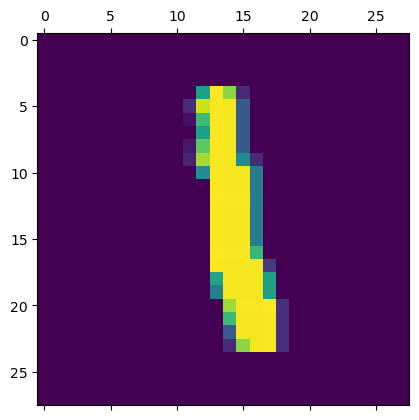

In [168]:
plt.matshow(x_train[6]) 

In [169]:
y_train[6]

1

Converting two dimensional 28*28 --> single dimensional array with 784 elements using pandas reshape function

In [170]:
x_train.shape

(60000, 28, 28)

What we want is :
(60000, 28, 28) --> (60000,784)

In [171]:
x_train_flat = x_train.reshape(len(x_train),28*28)

In [172]:
x_test_flat = x_test.reshape(len(x_test), 28*28)

In [173]:
x_test_flat.shape

(10000, 784)

In [174]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

In [175]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    
]) #means having a stack of layers in neural network., 10 is ouput layers 

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_flat,y_train,epochs=7) # fit() is where actually the training happens

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step - accuracy: 0.8179 - loss: 0.7090
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.9123 - loss: 0.3078
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.9211 - loss: 0.2839
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.9234 - loss: 0.2772
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.9261 - loss: 0.2661
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.9276 - loss: 0.2616
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - accuracy: 0.9269 - loss: 0.2602


In [176]:
model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step


array([[1.0864651e-02, 7.9371773e-08, 2.7499776e-02, ..., 9.9988413e-01,
        9.2212662e-02, 7.1456182e-01],
       [3.3380035e-01, 5.0662891e-03, 9.9933839e-01, ..., 2.9580898e-14,
        1.3419671e-01, 1.2028192e-10],
       [1.9617724e-04, 9.9326509e-01, 6.3468146e-01, ..., 7.9305112e-02,
        3.7419254e-01, 4.7487102e-02],
       ...,
       [1.6239841e-06, 1.1235827e-06, 6.3513167e-04, ..., 2.7142057e-01,
        5.4882222e-01, 8.3277333e-01],
       [3.6256959e-05, 6.8960137e-05, 4.8470054e-05, ..., 3.1115858e-05,
        7.3488307e-01, 5.1919971e-05],
       [2.5845205e-03, 1.3502964e-10, 1.4865731e-01, ..., 1.4514148e-09,
        1.6781059e-04, 2.3635724e-07]], dtype=float32)

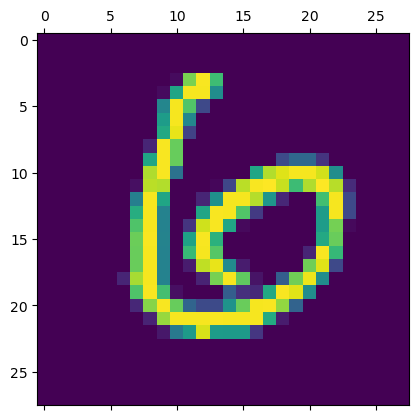

In [177]:
plt.matshow(x_test[11]) 

In [178]:
y_predicted=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step


In [179]:
y_predicted[0]

array([1.0864651e-02, 7.9371773e-08, 2.7499776e-02, 9.5395964e-01,
       1.4335519e-03, 1.2067103e-01, 2.7579387e-07, 9.9988413e-01,
       9.2212662e-02, 7.1456182e-01], dtype=float32)

In [180]:
np.argmax(y_predicted[11])

6

In [181]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [185]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)

In [186]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    1,    0,    5,    8,    4,    1,    1],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   6,    9,  918,   14,    6,    6,   13,   11,   44,    5],
       [   4,    0,   20,  895,    0,   39,    2,   13,   29,    8],
       [   1,    1,    2,    2,  900,    0,   14,    5,   10,   47],
       [   9,    3,    2,   20,    6,  793,   14,    9,   30,    6],
       [   7,    3,    5,    1,    7,   15,  915,    2,    3,    0],
       [   1,    5,   23,    3,    2,    0,    0,  966,    3,   25],
       [   5,    7,    6,   14,    9,   20,    9,   12,  883,    9],
       [   9,    7,    1,    7,   20,    6,    0,   25,    9,  925]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

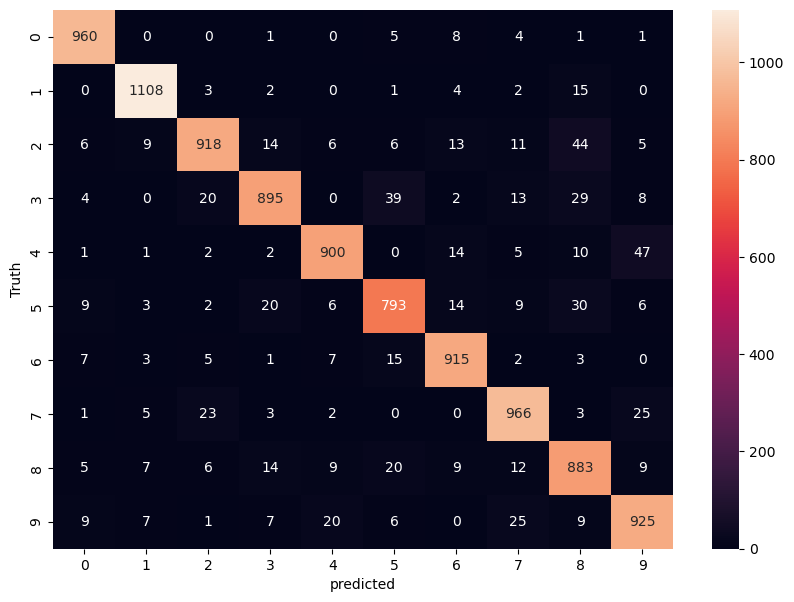

In [188]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')